   # Убытки в компании *Procrastinate Pro+*

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.  
  
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  
- лог сервера с данными об их посещениях,  
- выгрузка их покупок за этот период,  
- рекламные расходы.  
  
Вам предстоит изучить:  
- откуда приходят пользователи и какими устройствами они пользуются,  
- сколько стоит привлечение пользователей из различных рекламных каналов;  
- сколько денег приносит каждый клиент,  
- когда расходы на привлечение клиента окупаются,  
- какие факторы мешают привлечению клиентов.  
  
В вашем распоряжении три датасета.  
Файл *visits_info_short.csv* хранит лог сервера с информацией о посещениях сайта,  
*orders_info_short.csv* — информацию о заказах,  
а *costs_info_short.csv* — информацию о расходах на рекламу.

## Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Запускаем нужные для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import math
from scipy import stats as st
from math import factorial
from math import sqrt

Загружаем данные.

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    
    visits.to_csv('visits_info_short.csv', index = False)
    orders.to_csv('orders_info_short.csv', index = False)
    costs.to_csv('costs_info_short.csv', index = False)

### Ознакомление с данными

Посмотрим первые пять строк таблиц.

In [3]:
display(visits.head())
display(orders.tail())
costs.sample(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


,dt,Channel,costs
620,2019-07-20,TipTop,265.20
303,2019-09-01,MediaTornado,4.80
1425,2019-10-13,OppleCreativeMedia,12.50
1124,2019-06-14,LeapBob,7.14
1714,2019-08-03,lambdaMediaAds,8.00


Нужно привести все названия столбцов к нижнему регистру.   
Двойные названия столбцов *User Id*, *Session Start*, *Session End* (таблица *visits*), *User Id*, *Event Dt* (таблица *orders*) привести к надлежащему виду.

Описание данных.

Структура *visits_info_short.csv*:  
- *User Id* — уникальный идентификатор пользователя,
- *Region* — страна пользователя,
- *Device* — тип устройства пользователя,
- *Channel* — идентификатор источника перехода,
- *Session Start* — дата и время начала сессии,
- *Session End* — дата и время окончания сессии.

Структура *orders_info_short.csv*:
- *User Id* — уникальный идентификатор пользователя,
- *Event Dt* — дата и время покупки,
- *Revenue* — сумма заказа.

Структура *costs_info_short.csv*:
- *dt* — дата проведения рекламной кампании,
- *Channel* — идентификатор рекламного источника,
- *costs* — расходы на эту кампанию.

Посмотрим общую информацию о данных.

In [4]:
display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Нужно поменять тип данных во всех трёх таблицах в столбцах - *Session Start*, *Session End* (таблица *visits*), *Event Dt* (таблица *orders*), *dt* (таблица *costs*) с *object* на *datetime*.

### Предобработка данных

Приводим столбцы к нижнему регистру.

In [5]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

display(visits.head())
display(orders.tail())
costs.sample(5)

,user id,region,device,channel,session start,session end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user id,event dt,revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


,dt,channel,costs
1016,2019-08-25,AdNonSense,18.90
1330,2019-07-10,OppleCreativeMedia,9.00
1104,2019-05-25,LeapBob,3.78
1226,2019-09-24,LeapBob,13.44
1380,2019-08-29,OppleCreativeMedia,12.50


Приведём двойные названия в надлежащий вид.

In [6]:
visits = visits.rename(columns = {'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})
orders = orders.rename(columns = {'user id': 'user_id', 'event dt': 'event_dt'})

display(visits.head())
(orders.tail())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


Меняем тип данных.

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Судя по спискам применённой функции *info()* пропуски отсутствуют.

Проверим наличие дубликатов.

In [8]:
visits.duplicated().sum()

0

In [9]:
orders.duplicated().sum()

0

In [10]:
costs.duplicated().sum()

0

Дубликаты отсутствуют.

Проверим не явные дубликаты.

In [11]:
visits['region'].sort_values().unique()

array(['France', 'Germany', 'UK', 'United States'], dtype=object)

In [12]:
visits['device'].sort_values().unique()

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

In [13]:
visits['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

Приведём название *organic* к общему стилю.

In [14]:
visits = visits.replace('organic', 'Organic')
visits['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'Organic', 'RocketSuperAds', 'TipTop',
       'WahooNetBanner', 'YRabbit', 'lambdaMediaAds'], dtype=object)

In [15]:
costs['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

**Вывод:**   
сделали предобработку данных, а именно:  
зменили типы данных,  
привели имена столбцов к единому стилю,  
обработали явные и неявные дубликаты,  
также обработали пропуски.  

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Функция для создания профилей пользователей.

In [16]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция для подсчёта *Retention Rate*.

In [17]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для подсчёта конверсии.

In [18]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для подсчёта *LTV*.

In [19]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Функция построения графиков для сглаживания данных.

In [20]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция построения графиков для построения графика *Retention Rate*.

In [21]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

Функция построения графиков для построения графика конверсии.

In [22]:
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция построения графиков для визуализации *LTV* и *ROI*.

In [23]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Профили пользователей

Создаём профили.

In [24]:
profiles = get_profiles(visits, orders, costs)
profiles.sample(9)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
146463,976643615522,2019-09-07 17:08:09,FaceBoom,iPhone,United States,2019-09-07,2019-09-07,False,1.128205
16658,110618251848,2019-06-20 04:33:47,Organic,iPhone,United States,2019-06-20,2019-06-20,False,0.000000
118215,787742162828,2019-06-03 11:47:51,Organic,iPhone,France,2019-06-03,2019-06-03,False,0.000000
44203,292799416441,2019-06-22 02:44:47,Organic,PC,UK,2019-06-22,2019-06-22,False,0.000000
40075,265814219061,2019-09-14 20:31:35,Organic,PC,Germany,2019-09-14,2019-09-14,False,0.000000
104972,699992709939,2019-09-02 11:59:33,TipTop,Mac,United States,2019-09-02,2019-09-02,True,3.105263
96768,644627349013,2019-10-18 14:13:24,WahooNetBanner,PC,UK,2019-10-18,2019-10-18,False,0.591045
47299,313522768411,2019-05-27 11:31:46,YRabbit,Mac,United States,2019-05-27,2019-05-27,False,0.283333
62389,414005949115,2019-07-26 03:33:21,Organic,Android,United States,2019-07-26,2019-07-26,False,0.000000


Вычисляем минимальную и максимальную дату привлечения пользователей.

In [25]:
profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")

In [26]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 

In [27]:
min_analysis_date

Timestamp('2019-05-01 00:00:00')

In [28]:
observation_date

Timestamp('2019-10-27 00:00:00')

Минимальная дата привлечения пользователей - 1 мая 2019 года.

Максимальная дата привлечения пользователей - 27 октября 2019 года.

### Страны пользователей

Посмотрим таблицу.

In [29]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,Organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,Organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,Organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,Organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Создадим таблицу по странам. 

In [30]:
region_payer_share = pd.DataFrame()
region_payer_share['users_cnt'] = profiles.groupby('region')['user_id'].count()
region_payer_share['payer_users_cnt'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer_share['share'] = 100*(region_payer_share['payer_users_cnt'] / region_payer_share['users_cnt'])
region_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


Больше всего платящих пользователей приходится на *United States*.

### Устройства пользователей

Посмотрим таблицу.

In [31]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,Organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,Organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,Organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,Organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Создадим таблицу по устройствам.

In [32]:
device_payer_share = pd.DataFrame()
device_payer_share['users_cnt'] = profiles.groupby('device')['user_id'].count()
device_payer_share['payer_users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_share['share'] = 100*(device_payer_share['payer_users_cnt'] / device_payer_share['users_cnt'])
device_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


Большинство платящих пользователей предпочитают *IPhone*.

### Каналы привлечения пользователей

Посмотрим таблицу.

In [33]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,Organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,Organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,Organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,Organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Создадим таблицу по каналам привлечения.

In [34]:
channel_payer_share = pd.DataFrame()
channel_payer_share['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_payer_share['payer_users_cnt'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_payer_share['share'] = 100*(channel_payer_share['payer_users_cnt'] / channel_payer_share['users_cnt']) 
channel_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


Больше всего платящих пользователей пришло из канала *FaceBoom*.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Cумма расходов

Посмотрим таблицу.

In [35]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Посмотрим общую сумму.

In [36]:
costs['costs'].sum().round()

105497.0

Общая сумма затрат на маркетинг составила 105497$.

### Затраты на рекламные источники

Посмотрим таблицу.

In [37]:
costs.tail()

,dt,channel,costs
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8
1799,2019-10-27,lambdaMediaAds,12.0


Создадим таблицу затрат на рекламные источники.

In [38]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_report.sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего было потрачено на маркетинг в каналах *TipTop* и *FaceBoom*.

### Визуализация рассходов

Добавим в таблицу столбцы 'week' и 'month'.

In [39]:
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.sample(5)

,dt,channel,costs,week,month
339,2019-10-07,MediaTornado,4.56,41,10
1492,2019-06-22,WahooNetBanner,41.40,25,6
352,2019-10-20,MediaTornado,4.32,42,10
793,2019-07-13,YRabbit,2.70,28,7
307,2019-09-05,MediaTornado,4.32,36,9


Строим график по неделям.

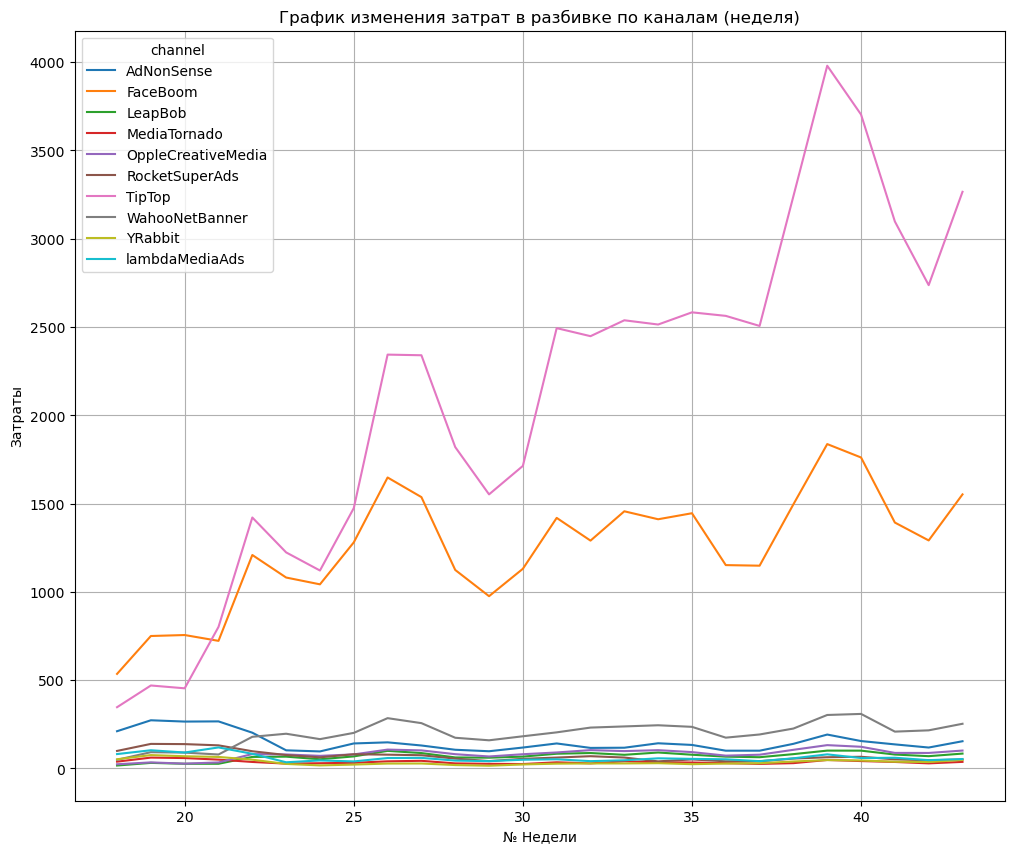

In [40]:
filtered_data = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')

filtered_data.plot(figsize=(12, 10),
                   grid=True,)

plt.title('График изменения затрат в разбивке по каналам (неделя)')
plt.xlabel('№ Недели')
plt.ylabel('Затраты')
plt.show()

Строим график по месяцам.

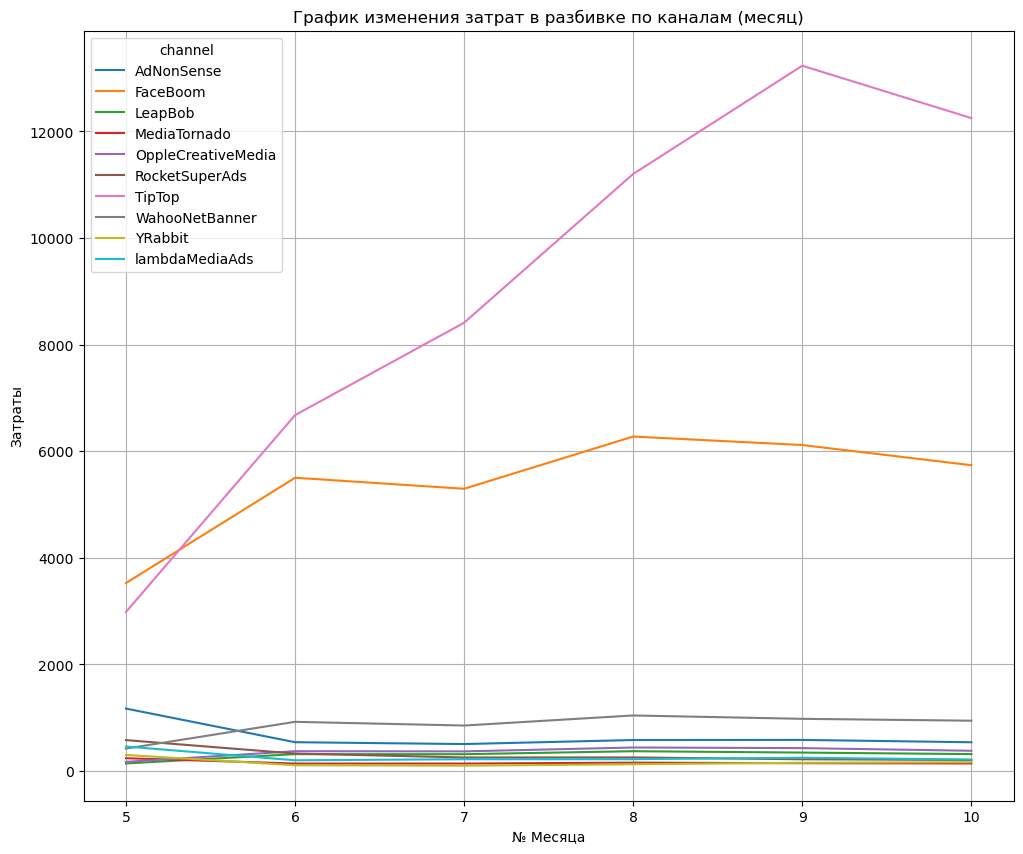

In [41]:
filtered_data = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')

filtered_data.plot(figsize=(12, 10),
                   grid=True,)

plt.title('График изменения затрат в разбивке по каналам (месяц)')
plt.xlabel('№ Месяца')
plt.ylabel('Затраты')
plt.show()

Можно сделать вывод, что затраты на маркетинг со временем возрастали только на двух каналах: *TipTop* и *FaceBoom*

### Среднее привлечения пользователей

Посмотрим на CAC для каждого источника трафика.

In [42]:
cac_by_channel = pd.DataFrame()
# уберём органических пользователей:
profiles = profiles.query('channel != "Organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самыми дорогими трафиками вышли *TipTop* (2.8), *FaceBoom* (1.11), *AdNonSense*(1.01).

Посчитаем средний САС для всего проекта.

In [43]:
profiles['acquisition_cost'].mean()

1.1274813239427588

Средний CAC для всего проекта составляет - 1.13.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Окупаемость рекламы c помощью графиков *LTV* и *ROI*, а также графики динамики *LTV*, *CAC* и *ROI*.

Задаём момент и горизонт анализа.

In [44]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

Cчитаем *LTV* и *ROI*.

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

Строим графики.

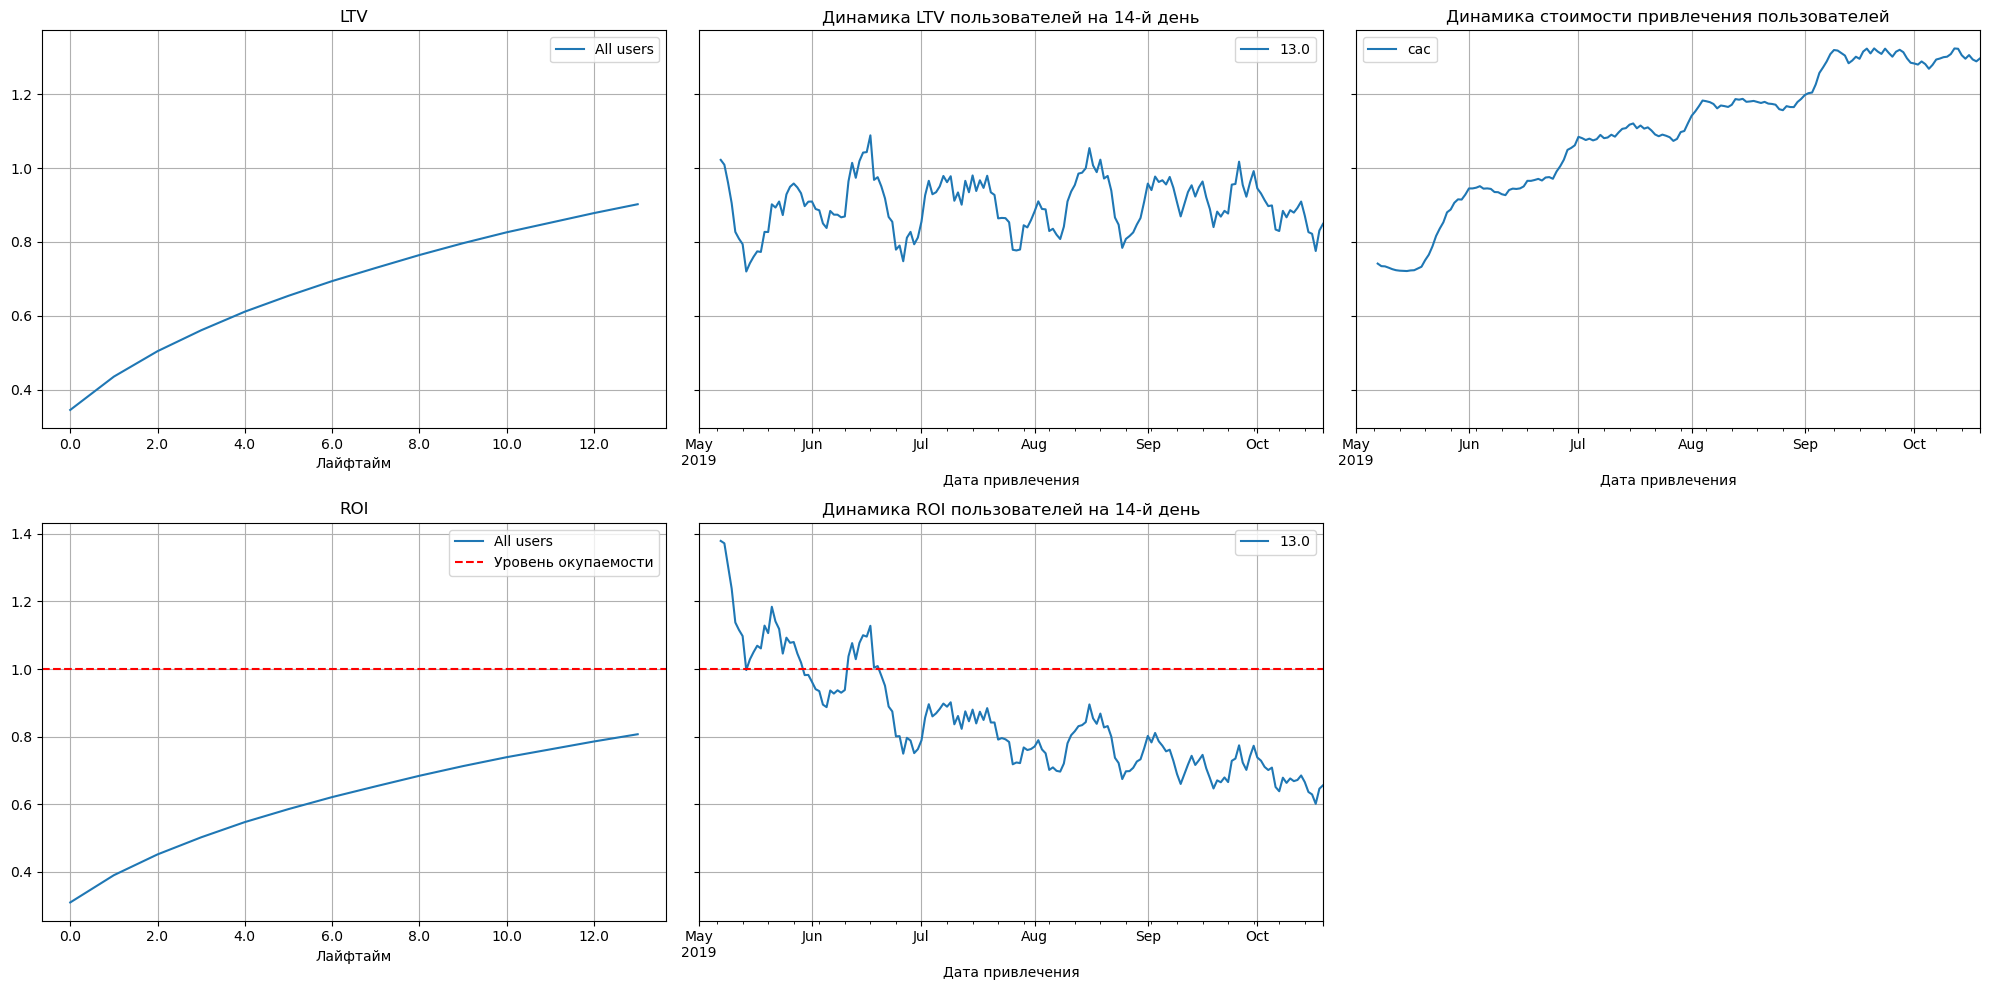

In [46]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод**:  
Рекламные компании не окупаются.  
Мы видим, что в мае реклама окупалась, но в июне начал падать и продолжал падать все остальное время.  
Динамика стоимости привлечения растет, что в принципе нормально.  
*LTV* стабильный.  
Необходимо уточнить, почему так происходит.

### Конверсия пользователей и динамика её изменения, удержание пользователей

Считаем конверсию и динамику конверсии.

In [47]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

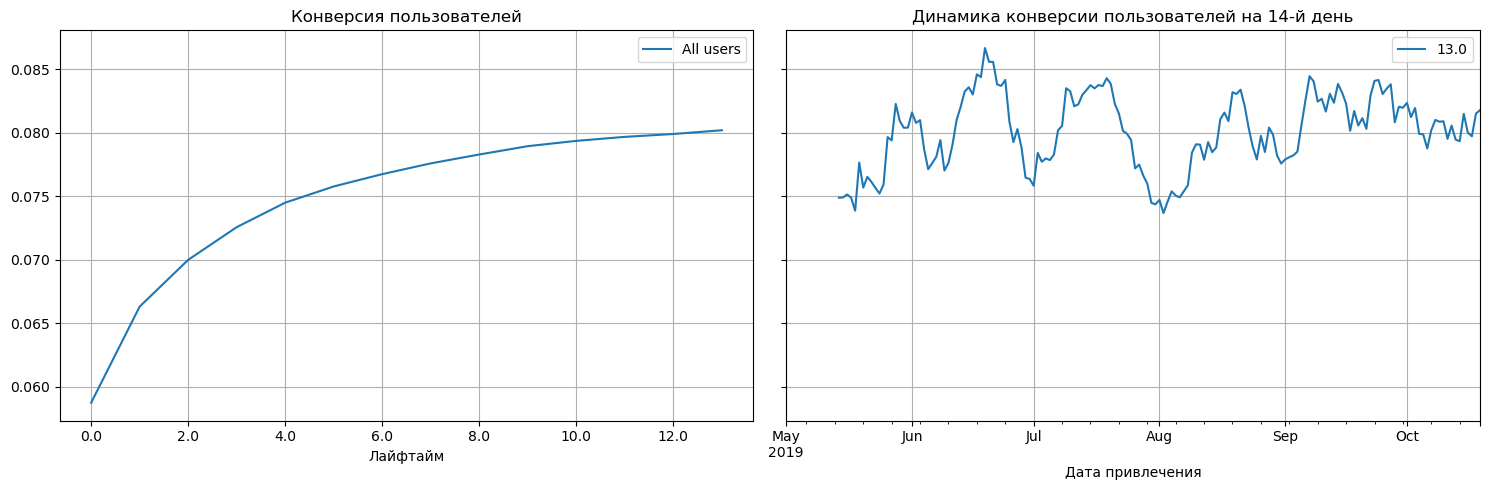

In [48]:
plot_conversion(conversion, conversion_history, horizon_days)

Судя по графикам общая динамика конверсии пользователей не стабильна.

Посчитаем удержание.

In [49]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

Построим графики.

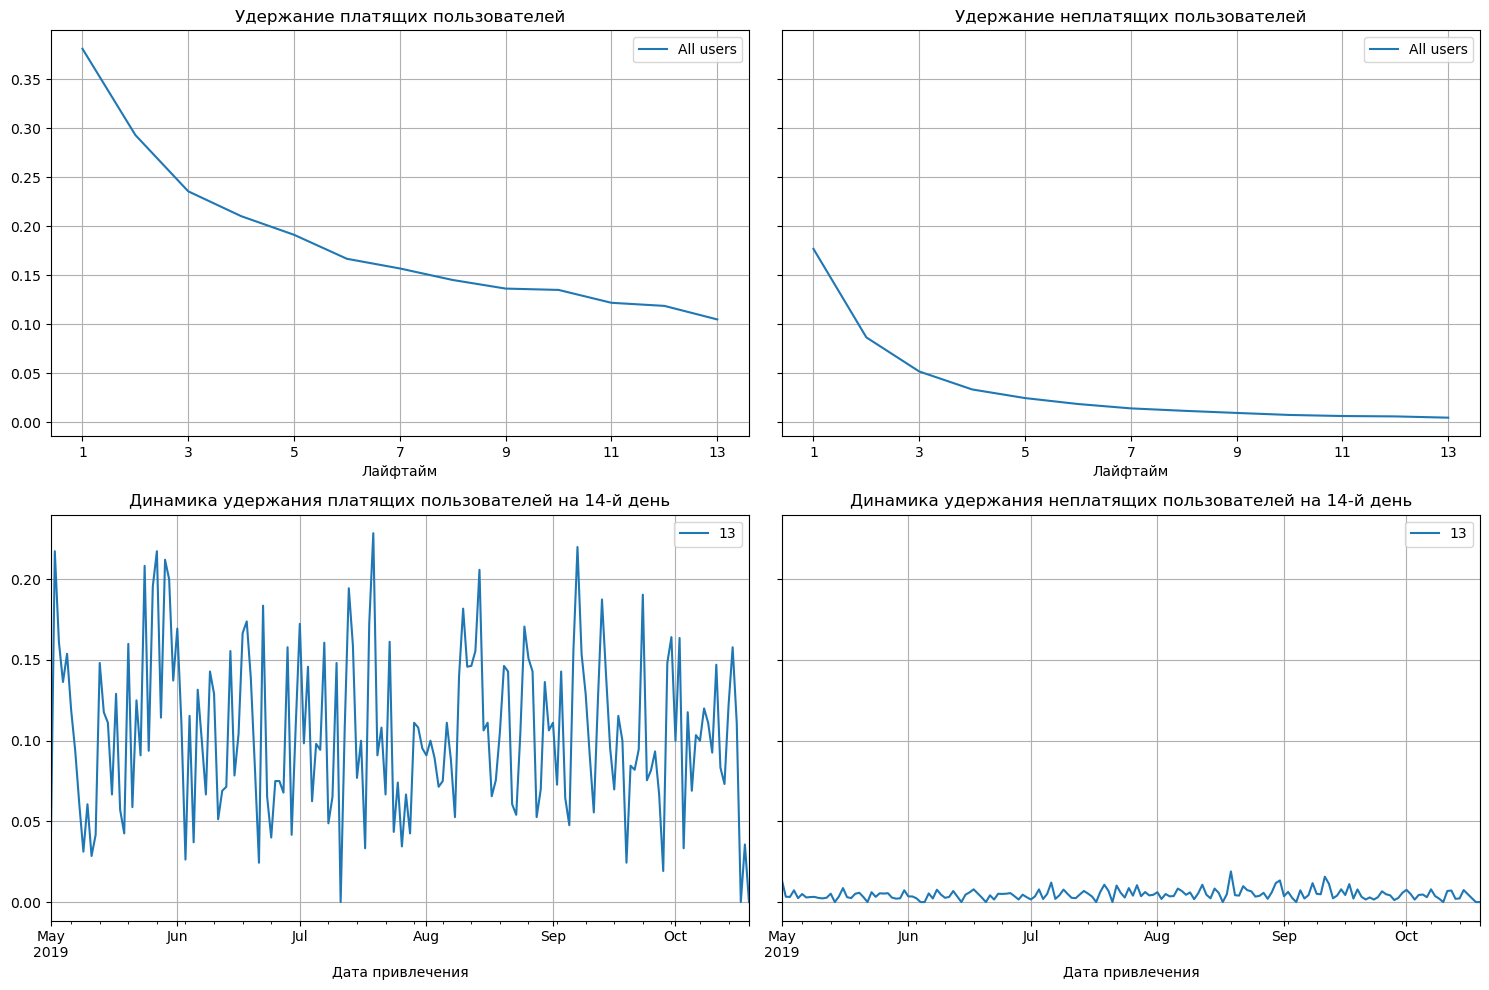

In [50]:
plot_retention(retention, retention_history, horizon_days)

Судя по графикам общая динамика удержания платящих пользователей стабильна.  
Общая динамика удержания не платящих пользователей стабильна.

### Окупаемость рекламы с разбивкой по устройствам

Построим графики.

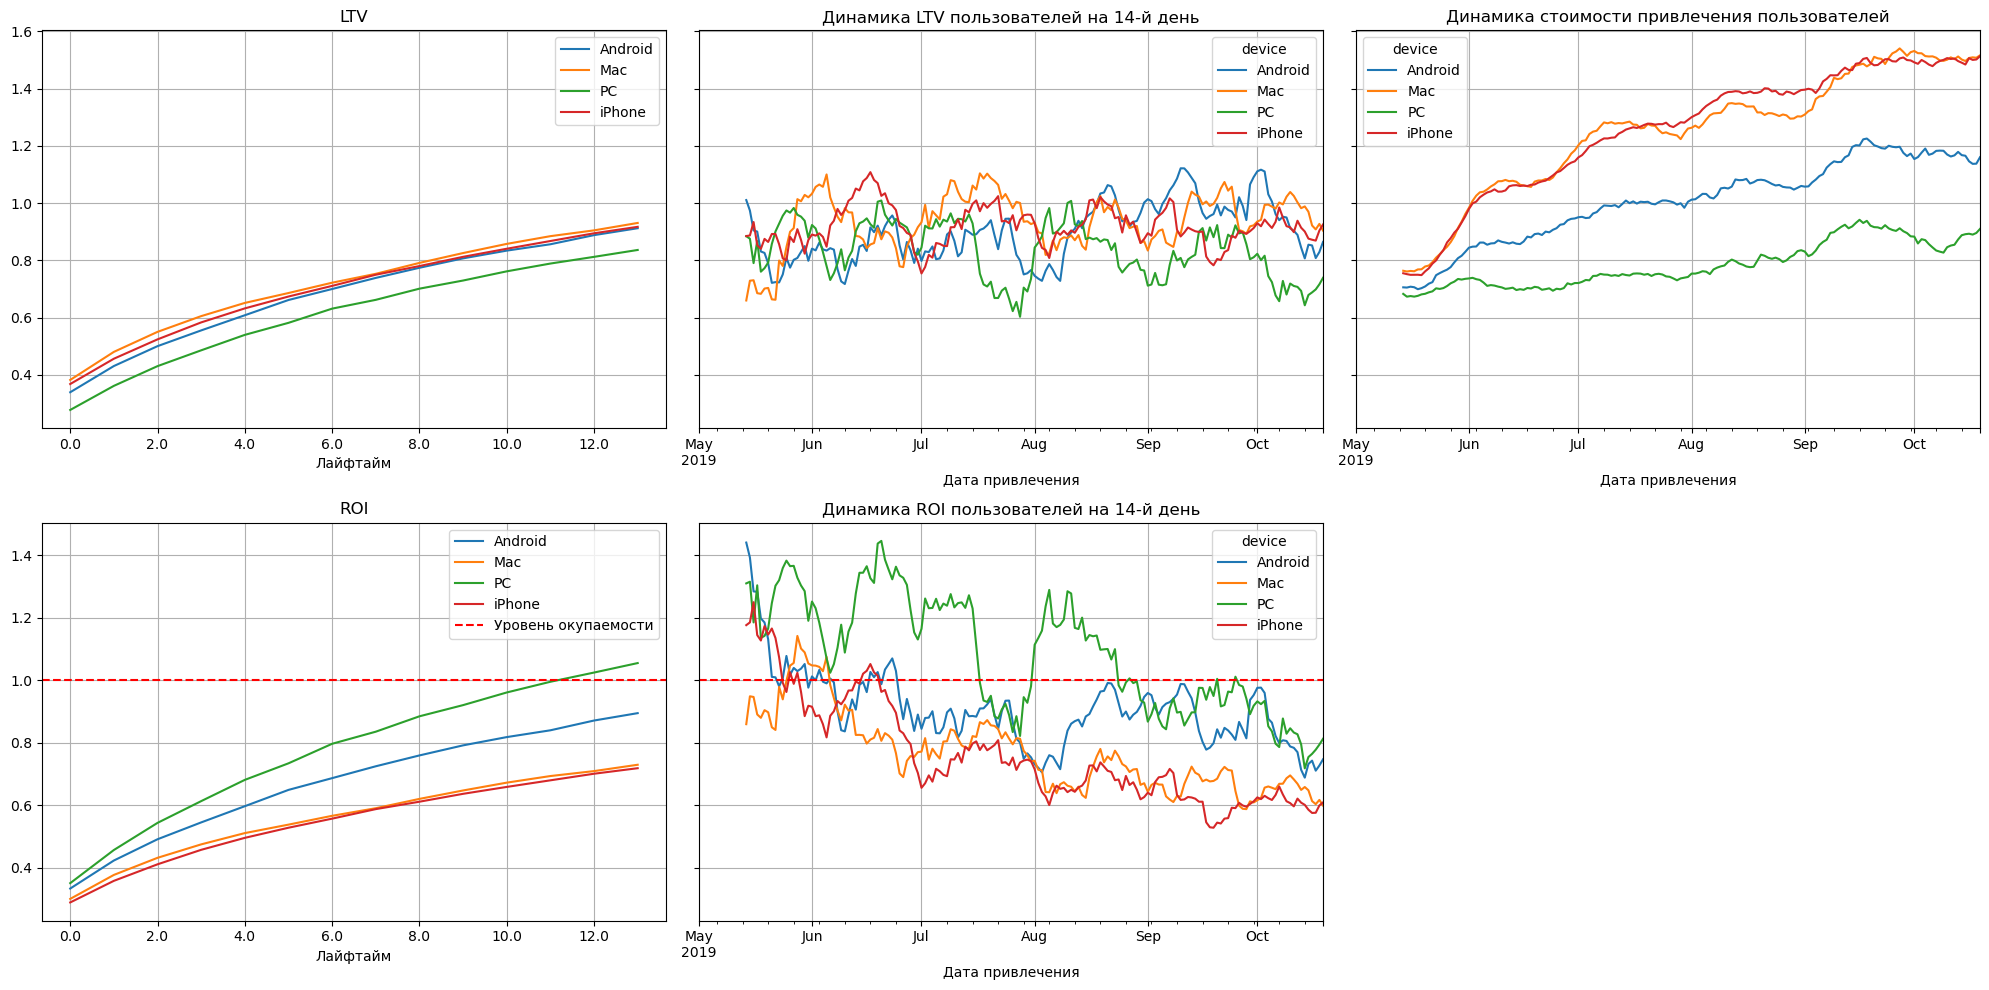

In [51]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод**: 
  
Мы видим, что по всем устройствам такая же история, в июне *ROI* начинает падать. *CAC* после июня, тоже начинает идти волнообразно, а в мае рос более или менее стабильно.  
*ROI* для *PС* выше всех, при этом стоимость привлечения меньше всех.  
  
До этого мы считали, что наибольшее кол-во пользователей это обладатели *iPhone* и *Android*. Тут мы видим, что *ROI* для *iPhone* самый низкий и динамика такая же как и у *Mac*. Скорей всего потому, что там одна операционная система. При этом *CAC* для *iPhone* и *Mac* самые большие. Другими словами, деньги на рекламу мы тратим для *iPhone* И *Mac*, видим что там самое большое кол-во пользователей, а реклама на самом деле не окупается.  
  
Нужно обратить внимание, на устройства *PC*. Там *ROI* переодически превышает единицу и в целом стремится к ней. При этом затраты небольшие.  

*LTV* у всех устройств стабильный. Самый низкий *LTV* у пользователей с устройством *PC*. У остальных *LTV* практически одинаковый.

Смотрим конверсию.

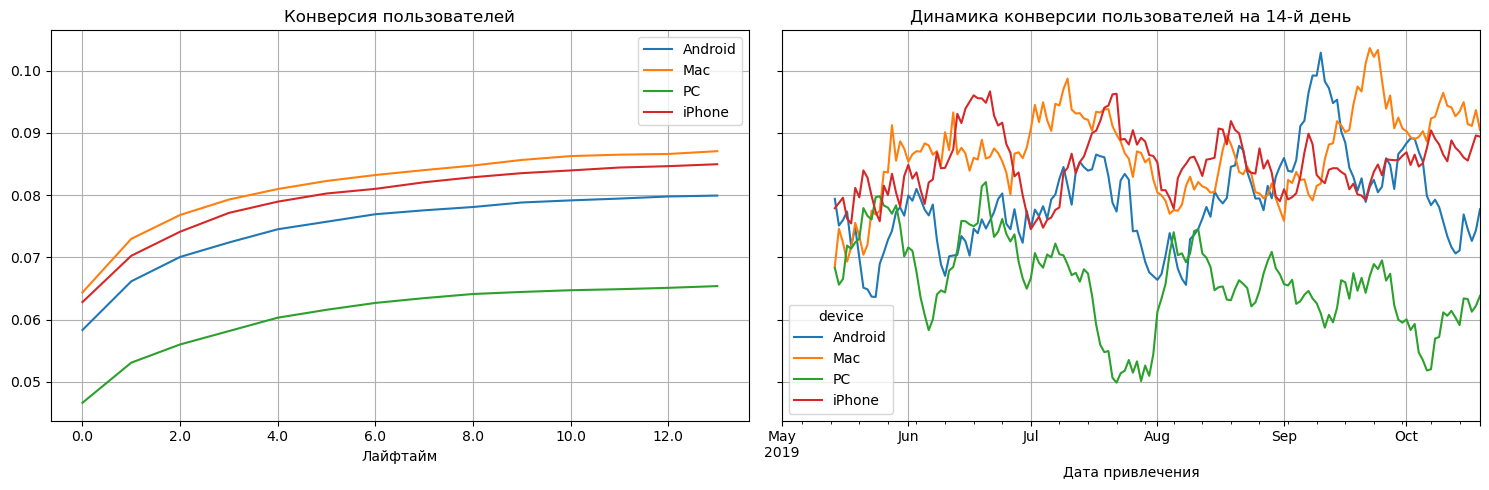

In [52]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По графику конверсии мы видим, что конверсия для *iPhone* и *Mac* хорошая, но денег это не приносит, либо приносит недостаточно.

Посмотрим удержание.

In [ ]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод**:  
  
У платящих пользователей хуже всего удержание для *iPhone* и *Mac*. Возможно потому, что это одна операционная система. Лучше всего удерживается пользователь на *PC*.  
Для неплатящих пользователей динамика по всем устройствам одинаковая.

### Окупаемость рекламы с разбивкой по странам

Построим графики.

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод**:  
  
В стране откуда основная масса наших пользователей, не окупается реклама. Мы видм, что *ROI* значительно ниже единицы, опять же в конце мая *LTV* в США достататочно хорошая. При этом стоимость привлечения пользователей самая большая и постоянно растет.  
Реклма которая окупается показывается в Британии и Германии.

Проверим конверсию по странам, чтобы понять почему в США такие плачевные показатели.

In [ ]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод**:  
  
Реклама для США приносит хорошую конверсию, но *ROI* такой низкий. Скорей всего дело в том что траты на рекламу првышают *LTV* от пользователей.

Посмотрим удержание.

In [ ]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**:  
  
Удержание и платящих и неплатящих пользователей постоянно уменьшается.  
И хуже всего эти показатели у США.

### Окупаемость рекламы с разбивкой по рекламным каналам

Строим графики.

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

In [ ]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод**:  
  
Реклама для площадок *TipTop* и *FaceBoom* не окупается. А это те площадки с которых на наше приложение заходит больше всего народу. Но мы видим, что *ROI* меньше единицы. Так же не окупается площадка *AdNonSence*, но там *ROI* иногда поднимается до уровня окупаемости. При этом мы видим, что затраты на рекламу *TipTop* постоянно и сильно растут и конверсия тоже есть. Мы тратим слишком много денег на рекламу, при этом привлечённые пользователи не приносят столько днеег, что бы мы смогли окупить ее.
  
*LTV* для всех каналов стабилен. Самые высокие показатели у каналов *LambdaMediaAds* и *TipTop*.

Посмотрим удержание.

In [ ]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**:  
  
Динамика удержания у платящих пользователей хуже всего у каналов *FaceBoom* и *AdNonSense*. Необходимо обратить на них внимание. У неплатящих пользователей динамика у всех каналов одинаковая.

Мы видим, что очень хорошо себя ведёт реклама на площадке *YRabbit*, *MediaTornado*, *lambdaMediaAds*. Высокий *Roi*, низкие затраты. Но мы видим, что конверсия хорошая только у *lambdaMediaAds*. Значит нашим маркетологам нужно проработать площадки *YRabbit*, *MediaTornado* более тщательно.

Отсортируем пользователей из США.

In [ ]:
profiles = profiles[profiles['region'] == "United States"]
profiles.sample(7)

Построим графики *LTV* и *ROI*.

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Реклама не окупается на площадках *TipTop* и *FaceBoom*. *ROI* не доходит до единицы, хотя *LTV* достаточно хороший. Динамика стоимости привлечения пользователей на площадке *TipTop* постоянно растёт, хотя на площадке *FaceBoom* она стабильна.  
  
Самый высокий *ROI* у площадки *YRabbit*, в июле и в августе был самый низкий показатель стоимости привлечения пользователей. *LTV* стабильный. Практически такие же показатели у площадок *MediaTornado* и *RocketSuperAds*.  

Посмотрим конверсию.

In [ ]:
visits = visits.loc[visits['channel'] != "Organic"]

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По графику видно, что конверсия для *FaceBoom* и *TipTop* хорошая.

Посмотрим удержание.

In [ ]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Хуже всего показатели удержания платящих пользователей у канала *FaceBoom*.

**Вывод**:  
  
- Показатели *ROI* у площадок *TipTop* и *FaceBoom* наихудшие, хотя показатели *LTV* и конверсия очень хорошии. 
- Стоимость привлечения пользователей самая высокая у площадки *TipTop* и постоянно растёт. 
- Самые низкие показатели удержания платящих пользователей у площадки *FaceBoom*.
- Показатели *ROI* у площадок *YRabbit* и *MediaTornado* самые высокие, хотя показатели *LTV* и конверсия не очень хорошии.
- Стоимость привлечения пользователей у площадок *YRabbit* и *RocketSuperAds* имеет тенденцию к снижению, а у площадки *MediaTornado* самый стабильно низкий показатель.
  
Из выше перечисленного следует: что стоит перераспределить рекламный бюджет на площадки *YRabbit*, *RocketSuperAds* и *MediaTornado*.

Посмотрим как обстоят дела в Европейских странах.

In [ ]:
profiles = get_profiles(visits, orders, costs)
profiles.sample(9)

Уберём пользователей из США и органических пользователей.

In [ ]:
profiles = profiles.loc[profiles['region'] != "United States"]
profiles = profiles.loc[profiles['channel'] != "Organic"]
profiles.sample(7)

Посмотрим *LTV* и *ROI*.

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

В Европе реклама окупается. Единственное на что стоит обратить внимание это на площадку *AdNonSense*. У неё самый низкий *ROI* и самая высокая стоимость привлечения пользователей.

Посмотрим конверсию.

In [ ]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия у всех площадок хорошая.

Посмотрим удержание.

In [ ]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

У площадки *AdNonSense* так же самый низкий показатель удержания платящих пользователей.

**Вывод**:  
  
В Европе реклама окупается.  
Нужно обратить внимание на площадку *AdNonSense*.

### Вопросы

Ответьте на такие вопросы:  
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?
- Опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Реклама не окупается в США, в Европе реклама окупается.

Хуже всего дела обстаят в США и на использующихся там платформах *TipTop* и *FaceBoom*. Так же хуже всего обстоят дела с устройствами *IPhone* и *MAC*.

Проблемы с окупаемостью вызваны неправильным распределением средств на рекламные компании для площадок в США.

Самая не выгодная площадка для пользователей из США это *TipTop* - слишком большая стоимость привлечения клиентов.  
Стоит обратить внимание на площадки *YRabbit*, *RocketSuperAds* и *MediaTornado*, а также на владельцев *РС* устройств.

## Напишите выводы

- Выделите причины не эффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

### Выделите причины неэффективности привлечения пользователей

Не эффективное распределение денежных средств между площадками в США. Слишком большие затраты для одной площадки *TipTop* хотя она не приносит доход.  
  
Возможно не корректная работа приложения *Procrastinate Pro+* на устройствах *iPhone* и *MAC*.

### Сформулируйте рекомендации для отдела маркетинга

Перераспределить денежные средства для рекламных кампаний между площадками в США. Самые лучшие показатели *ROI* в США у площадок *YRabbit*, *RocketSuperAds* и *MediaTornado*, так же эти площадки имеют тенденцию к снижению стоимости привлечения пользователей.

Нужно проверить работу приложения *Procrastinate Pro+* на устройствах *iPhone* и *MAC*.

Наихудшие показатели в Европе у площадки *AdNonSense*. У этой площадки самый низкий *ROI*, высокая стоимость привлечения пользователей и самый низкий показатель удержания платящих пользователей. Стоит поискать другие площадки для привлечения клиентов или изменить рекламный контент для этой площадки.

Так же стоит обратить внимание на пользователей устройств *РС*. У них наилучший показатель *ROI*, самая низкая стоимость привлечения клиентов и самое лучшее удержание платящих пользователей.